# Load Dataset

In [1]:
import pandas as pd
import numpy as np
import pickle
import os
import sys

In [2]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 100)
pd.options.display.float_format = '{:.0f}'.format

In [3]:
DATA_ROOT_DIR='/mnt/data/projects/MD7'
PROJ_ROOT_DIR='/home/priyesh/projects/MD7'

In [4]:
filepath=os.path.join(DATA_ROOT_DIR,'data/import','yahoo_cash.csv')
cash_sheets = pd.read_csv(filepath)
filepath=os.path.join(DATA_ROOT_DIR,'data/import','yahoo_balance.csv')
balance_sheets = pd.read_csv(filepath)
filepath=os.path.join(DATA_ROOT_DIR,'data/import','yahoo_income.csv')
income_sheets = pd.read_csv(filepath)
filepath=os.path.join(DATA_ROOT_DIR,'data/import','yahoo_data_labels.csv')
data_labels = pd.read_csv(filepath)

## Check For Nulls

In [5]:
income_sheets.isnull().sum().any()

False

In [6]:
cash_sheets.isnull().sum().any()

False

In [7]:
balance_sheets.isnull().sum().any()

False

## Data Labels

In [8]:
data_labels.describe()

,FinalScore,cashScore,incomeScore,balanceScore
count,728,728,728,728
mean,2,3,3,3
std,1,1,1,1
min,0,0,0,0
25%,2,2,2,2
50%,2,3,3,3
75%,3,4,4,3
max,4,4,4,4


<Axes: ylabel='Frequency'>

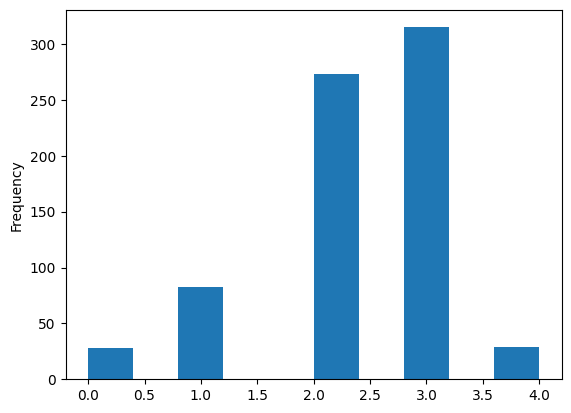

In [9]:
data_labels['FinalScore'].sort_values().plot(kind='hist')

In [10]:
data_labels['FinalScore'].value_counts().sort_index()

FinalScore
0     28
1     83
2    273
3    315
4     29
Name: count, dtype: int64

## Income Sheet

In [13]:
income_sheets.describe()

,st_YR,st_Mnth,totalRevenue,costOfRevenue,grossProfit,netIncome,operatingIncome,netIncomeContinuousOperations,netInterestIncome,interestIncome,otherIncomeExpense,operatingExpense,totalExpenses,taxProvision,interestExpense,SGA,researchAndDevelopment,ebit,dilutedEPS,basicEPS
count,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912
mean,2021,10,16373030415,10928580768,5438547023,1327383026,2096451054,1322646775,-257285887,36466068,-109669394,3664900404,14368151817,310985972,292517027,2469052014,545294781,2003516604,5,5
std,1,3,40748904663,31202764143,13139659361,5276033799,7862261787,5286553341,639691030,209455845,1432078382,10203704712,37036420805,1137910507,650171337,6212399222,2454228685,7989554273,21,22
min,2019,1,-100469000,0,-7596000000,-22440000000,-28883000000,-23251000000,-9806000000,-58441000,-20216000000,-2201000000,-808922000,-5632000000,-38505000,-382000000,0,-28883000000,-122,-122
25%,2020,12,2224588750,1034735250,917165000,57828750,211075000,58420750,-244000000,0,-66000000,597327250,1990106750,7960500,26418750,411656000,0,156103750,0,0
50%,2021,12,5397541000,2937447500,1951209000,403897000,639150000,407150000,-88800000,1000000,-1285000,1223000000,4690150000,89700000,98150000,891679500,0,608950000,3,3
75%,2022,12,13966500000,8643050000,4547325000,1170250000,1794454500,1165000000,-18864500,13741000,22633000,2969265250,12054500000,273700000,270075000,2130750000,220828750,1724160250,5,6
max,2023,12,611289000000,463721000000,170782000000,99803000000,264938000000,99803000000,5394000000,4961000000,15005000000,254406000000,590861000000,20176000000,10521000000,127140000000,42740000000,264938000000,500,525


In [14]:
# check that we have 4 records for all companies

income_sheets['company'].value_counts().sort_values().head(4)

company
A      4
AES    4
AAL    4
AAP    4
Name: count, dtype: int64

## Cash Sheet

In [15]:
cash_sheets.describe()

,st_YR,st_Mnth,netIncome,netIncomeFromContinuingOperations,depreciation,stockBasedCompensation,cashFlowOperatingActivities,capitalExpenditure,saleOfBusiness,purchaseOfBusiness,netBusinessPurchaseAndSale,saleOfPPE,purchaseOfPPE,netPPEPurchaseAndSale,saleOfInvestment,purchaseOfInvestment,netInvestmentPurchaseAndSale,saleOfInvestmentProperties,purchaseOfInvestmentProperties,netInvestmentPropertiesPurchaseAndSale,saleOfIntangibles,purchaseOfIntangibles,netIntangiblesPurchaseAndSale,netOtherInvestingChanges,cashFlowInvestingActivities,netIssuancePaymentsOfDebt,netLongTermDebtIssuance,netShortTermDebtIssuance,commonStockDividendPaid,preferredStockDividendPaid,cashDividendsPaid,netCommonStockIssuance,netPreferredStockIssuance,repurchaseOfCapitalStock,netOtherFinancingCharges,cashFlowFinancingActivities,freeCashFlow
count,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912
mean,2021,10,1327720601,1338411228,1016983503,199426993,2488221419,-1119237358,131263703,-491856150,-364599208,81758140,-628844673,-537911953,1238649114,-1254131293,-17183160,5320158,-638367,4726231,2344905,-40017666,-37889786,14542300,-1379990464,262291827,265938271,-6789898,-520206001,-1810854,-587338067,-646757412,18195405,-783992268,-89585106,-1021923065,1418858736
std,1,3,5276666404,5301763409,2723829127,910413704,7334191822,3456513348,780961025,1985562787,2011085858,726572839,2843829275,2668247388,7186801687,7067768758,1901023857,140558742,11457118,141035588,61936004,923125699,925156966,759749060,4149479825,2681489232,2534027493,909314248,1606879178,37266223,1693867344,3875497135,320320623,3866905299,889639575,5838875652,5496674511
min,2019,1,-22440000000,-23251000000,0,-3600000,-19047000000,-67882000000,-100000,-39610000000,-39610000000,0,-63645000000,-58321000000,0,-143751000000,-22242000000,0,-459000000,-459000000,0,-47596000000,-47596000000,-22236000000,-67153000000,-38259000000,-36157000000,-19692000000,-18135000000,-1950000000,-18135000000,-89402000000,-2665000000,-89402000000,-10393000000,-110749000000,-28343000000
25%,2020,12,57828750,57694750,99312000,20162000,289975000,-725375000,0,-239965000,-204602250,0,-242000000,-226700000,0,-405274250,-15000000,0,0,0,0,0,0,-1420000,-1231000000,-133000000,-128536750,0,-294130500,0,-372739000,-428500000,0,-472977500,-73576250,-933300000,75067750
50%,2021,12,404229500,409159500,267993500,49700000,738650000,-227555000,0,-20404500,-8650000,0,-47698500,-41727500,0,-729500,0,0,0,0,0,0,0,0,-394000000,0,0,0,-22349500,0,-69355500,-57000000,0,-74272500,-17759500,-211951500,429332500
75%,2022,12,1170250000,1182868250,798725000,121952000,2023139250,-77954750,0,0,0,2000000,0,0,371870250,0,0,0,0,0,0,0,0,7222500,-117739500,455953500,460937000,0,0,0,0,0,0,0,-684500,149800750,1179175000
max,2023,12,99803000000,99803000000,46009000000,19621000000,122151000000,0,21013000000,0,20928000000,14393000000,0,10956000000,133929000000,0,58093000000,4373820000,0,4373820000,3028000000,0,3028000000,8033000000,45896000000,36250000000,36250000000,15662000000,0,0,0,16188000000,9950000000,0,22952000000,34955000000,111443000000


In [16]:
x = list(cash_sheets.columns)
x.sort()
x

['capitalExpenditure',
 'cashDividendsPaid',
 'cashFlowFinancingActivities',
 'cashFlowInvestingActivities',
 'cashFlowOperatingActivities',
 'commonStockDividendPaid',
 'company',
 'depreciation',
 'freeCashFlow',
 'gics_sector',
 'industry',
 'netBusinessPurchaseAndSale',
 'netCommonStockIssuance',
 'netIncome',
 'netIncomeFromContinuingOperations',
 'netIntangiblesPurchaseAndSale',
 'netInvestmentPropertiesPurchaseAndSale',
 'netInvestmentPurchaseAndSale',
 'netIssuancePaymentsOfDebt',
 'netLongTermDebtIssuance',
 'netOtherFinancingCharges',
 'netOtherInvestingChanges',
 'netPPEPurchaseAndSale',
 'netPreferredStockIssuance',
 'netShortTermDebtIssuance',
 'preferredStockDividendPaid',
 'purchaseOfBusiness',
 'purchaseOfIntangibles',
 'purchaseOfInvestment',
 'purchaseOfInvestmentProperties',
 'purchaseOfPPE',
 'repurchaseOfCapitalStock',
 'saleOfBusiness',
 'saleOfIntangibles',
 'saleOfInvestment',
 'saleOfInvestmentProperties',
 'saleOfPPE',
 'st_Mnth',
 'st_YR',
 'st_date',
 'stock

In [17]:
# drop columns

cols = ['netBusinessPurchaseAndSale',
        'netCommonStockIssuance',
        'netIncome',
        'netIncomeFromContinuingOperations',
        'netIntangiblesPurchaseAndSale',
        'netInvestmentPropertiesPurchaseAndSale',
        'netInvestmentPurchaseAndSale',
        'netIssuancePaymentsOfDebt',
        'netLongTermDebtIssuance',
        'netOtherFinancingCharges',
        'netOtherInvestingChanges',
        'netPPEPurchaseAndSale',
        'netPreferredStockIssuance',
        'netShortTermDebtIssuance',
        'commonStockDividendPaid',
        'preferredStockDividendPaid',
        'purchaseOfInvestmentProperties',
        'purchaseOfBusiness',
        'purchaseOfIntangibles',
        'purchaseOfInvestment',
        'saleOfIntangibles',
        'saleOfInvestment',
        'saleOfInvestmentProperties',
        'saleOfPPE'
        ]

cash_sheets = cash_sheets.drop(cols,axis=1)

In [18]:
cash_sheets.shape

(2912, 18)

In [19]:
# Reverse sign for these columns

cols=['capitalExpenditure',
      'repurchaseOfCapitalStock',
      'cashDividendsPaid',
      'purchaseOfPPE',
      'cashFlowInvestingActivities',
      'cashFlowFinancingActivities'
     ]

for feature in cols:
  cash_sheets[feature] = cash_sheets[feature] * -1 


In [20]:
cash_sheets.describe()

,st_YR,st_Mnth,depreciation,stockBasedCompensation,cashFlowOperatingActivities,capitalExpenditure,saleOfBusiness,purchaseOfPPE,cashFlowInvestingActivities,cashDividendsPaid,repurchaseOfCapitalStock,cashFlowFinancingActivities,freeCashFlow
count,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912
mean,2021,10,1016983503,199426993,2488221419,1119237358,131263703,628844673,1379990464,587338067,783992268,1021923065,1418858736
std,1,3,2723829127,910413704,7334191822,3456513348,780961025,2843829275,4149479825,1693867344,3866905299,5838875652,5496674511
min,2019,1,0,-3600000,-19047000000,-0,-100000,-0,-45896000000,-0,-0,-34955000000,-28343000000
25%,2020,12,99312000,20162000,289975000,77954750,0,-0,117739500,-0,-0,-149800750,75067750
50%,2021,12,267993500,49700000,738650000,227555000,0,47698500,394000000,69355500,74272500,211951500,429332500
75%,2022,12,798725000,121952000,2023139250,725375000,0,242000000,1231000000,372739000,472977500,933300000,1179175000
max,2023,12,46009000000,19621000000,122151000000,67882000000,21013000000,63645000000,67153000000,18135000000,89402000000,110749000000,111443000000


In [21]:
# check that we have 4 records for all companies

cash_sheets['company'].value_counts().sort_values().head(4)

company
A      4
AES    4
AAL    4
AAP    4
Name: count, dtype: int64

## Balance Sheet

In [22]:
balance_sheets.describe()

,st_YR,st_Mnth,cashEquivalent,receivables,finishedGoods,workInProcess,rawMaterials,otherCurrentAssets,inventory,currentAssets,netPPE,otherNonCurrentAssets,financialAssets,goodwill,goodwillAndOtherIntangibleAssets,otherIntangibleAssets,nonCurrentAccountsReceivable,totalNonCurrentAssets,currentDebt,payablesAndAccruedExpenses,otherCurrentLiabilities,currentLiabilities,longTermDebt,otherNonCurrentLiabilities,nonCurrentDeferredLiabilities,nonCurrentDeferredTaxesLiabilities,longTermProvisions,totalNonCurrentLiabilities,retainedEarnings,stockholdersEquity
count,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912
mean,2021,10,2592150347,2124474070,820854673,181842526,267507253,503701023,12577024417,7078759128,7945380062,1213088993,13178376,4029274997,6688948756,2678309180,226094401,17552441104,871267531,3174344577,744772097,6639118103,7844909453,1368853000,1196285742,970537783,188177669,11106113801,6344942089,7912931134
std,1,3,8962706445,5059356685,4063293676,765245971,707037813,1525669707,292070747527,16426701932,19866947989,3468506016,125862294,9221563492,18368519267,10806095411,2438301066,37304316782,3374882413,8225014065,2852988038,35193164171,16128193361,4514563456,3749283144,3508215658,1028279594,22954499242,22845216215,19082919718
min,2019,1,0,0,0,0,0,-1000000,0,27409000,0,0,0,0,-399000000,-399000000,0,0,0,0,-89400000,7223000,0,-360832000,0,0,0,0,-32767000000,-18316000000
25%,2020,12,251477250,256956750,0,0,0,11084000,26371000,1295304000,451236750,53854000,0,194782250,343163250,49349500,0,1941832750,18625000,303815250,0,665000000,979222000,41166500,20162250,0,0,1260754750,-185000000,1112754250
50%,2021,12,699499500,697778000,18792500,0,0,97027000,453950000,2611246500,1453500000,248500000,0,1226421000,1863478000,357557000,0,5536386000,106379500,929629500,21897500,1714000000,2787211500,240300500,173100000,93201000,0,3538104500,1410400000,2746791000
75%,2022,12,1876750000,1754708750,437400000,54325000,219129500,326925000,1513135500,6011500000,5516113000,884500000,0,3615250000,5151368500,1384725000,0,15848750000,584800000,2437250000,389112250,4416000000,7438125000,950250000,801579500,562750000,0,10429500000,4888903000,6854721000
max,2023,12,139649000000,62888000000,70153000000,10739000000,9191000000,21223000000,8171500000000,188143000000,253018000000,54428000000,4108000000,146241000000,303858000000,161257000000,55277000000,497123000000,90900000000,142166000000,60845000000,973120000000,185670000000,108500000000,64871000000,64871000000,12819000000,283083000000,432860000000,256144000000


In [23]:
# check that we have 4 records for all companies

balance_sheets['company'].value_counts().sort_values().head(4)

company
A      4
AES    4
AAL    4
AAP    4
Name: count, dtype: int64

In [24]:
### Add totals and ratios

balance_sheets['totalDebt'] = balance_sheets['currentDebt'] + balance_sheets['longTermDebt']
balance_sheets['totalAssets'] = balance_sheets['currentAssets'] + balance_sheets['totalNonCurrentAssets']
balance_sheets['totalLiabilities'] = balance_sheets['currentLiabilities'] + balance_sheets['totalNonCurrentLiabilities']
balance_sheets['workingCapital'] = balance_sheets['currentAssets'] - balance_sheets['currentLiabilities']

balance_sheets['quickRatio'] = (balance_sheets['currentAssets'] - balance_sheets['inventory']) / balance_sheets['currentLiabilities']
balance_sheets['currentRatio'] = balance_sheets['currentAssets'] / balance_sheets['currentLiabilities']
balance_sheets['debtCapitalRatio'] = 100 * balance_sheets['totalDebt'] / (balance_sheets['totalDebt'] + balance_sheets['stockholdersEquity'])
balance_sheets['debtAssetRatio'] = 100 * balance_sheets['totalDebt'] / balance_sheets['totalAssets']


## Combine the three datasets into 1

In [25]:
def add_col_prefix(cols, prefix):
  '''
  Add prefix to columns
  '''
  cols_temp = [prefix + x for x in cols]
    
  return cols_temp

In [26]:
# Drop sector, date and month. We don't need them.

income_sheets = income_sheets.drop(['yahoo_sector','gics_sector','yahoo_sector','st_date','st_Mnth'], axis=1)
balance_sheets = balance_sheets.drop(['yahoo_sector','gics_sector','yahoo_sector','st_date','st_Mnth'], axis=1)
cash_sheets = cash_sheets.drop(['yahoo_sector','gics_sector','yahoo_sector','st_date','st_Mnth'], axis=1)

In [27]:
# Add prefix to columns in income_sheets

cols = list(income_sheets.columns)
income_sheets.columns = cols[0:3] + add_col_prefix(cols[3:],'inc_')
income_sheets.head()

,company,industry,st_YR,inc_totalRevenue,inc_costOfRevenue,inc_grossProfit,inc_netIncome,inc_operatingIncome,inc_netIncomeContinuousOperations,inc_netInterestIncome,inc_interestIncome,inc_otherIncomeExpense,inc_operatingExpense,inc_totalExpenses,inc_taxProvision,inc_interestExpense,inc_SGA,inc_researchAndDevelopment,inc_ebit,inc_dilutedEPS,inc_basicEPS
0,A,Diagnostics & Research,2019,5163000000,2358000000,2805000000,1071000000,941000000,1071000000,-38000000,36000000,16000000,1864000000,4222000000,-152000000,74000000,1460000000,404000000,993000000,3,3
1,A,Diagnostics & Research,2020,5339000000,2502000000,2837000000,719000000,846000000,719000000,-70000000,8000000,66000000,1991000000,4493000000,123000000,78000000,1496000000,495000000,920000000,2,2
2,A,Diagnostics & Research,2021,6319000000,2912000000,3407000000,1210000000,1347000000,1210000000,-79000000,2000000,92000000,2060000000,4972000000,150000000,81000000,1619000000,441000000,1441000000,4,4
3,A,Diagnostics & Research,2022,6848000000,3126000000,3722000000,1254000000,1618000000,1254000000,-75000000,9000000,-39000000,2104000000,5230000000,250000000,84000000,1637000000,467000000,1588000000,4,4
4,AA,Aluminum,2019,10433000000,8537000000,1896000000,-1125000000,876000000,-853000000,-121000000,0,-1193000000,1020000000,9557000000,415000000,121000000,280000000,27000000,-317000000,-6,-6


In [28]:
# Add prefix to columns in balance_sheets

cols = list(balance_sheets.columns)
balance_sheets.columns = cols[0:3] + add_col_prefix(cols[3:],'bal_')
balance_sheets.head()

,company,industry,st_YR,bal_cashEquivalent,bal_receivables,bal_finishedGoods,bal_workInProcess,bal_rawMaterials,bal_otherCurrentAssets,bal_inventory,bal_currentAssets,bal_netPPE,bal_otherNonCurrentAssets,bal_financialAssets,bal_goodwill,bal_goodwillAndOtherIntangibleAssets,bal_otherIntangibleAssets,bal_nonCurrentAccountsReceivable,bal_totalNonCurrentAssets,bal_currentDebt,bal_payablesAndAccruedExpenses,bal_otherCurrentLiabilities,bal_currentLiabilities,bal_longTermDebt,bal_otherNonCurrentLiabilities,bal_nonCurrentDeferredLiabilities,bal_nonCurrentDeferredTaxesLiabilities,bal_longTermProvisions,bal_totalNonCurrentLiabilities,bal_retainedEarnings,bal_stockholdersEquity,bal_totalDebt,bal_totalAssets,bal_totalLiabilities,bal_workingCapital,bal_quickRatio,bal_currentRatio,bal_debtCapitalRatio,bal_debtAssetRatio
0,A,Diagnostics & Research,2019,1382000000,930000000,416000000,0,263000000,198000000,679000000,3189000000,850000000,611000000,0,4700000000,4700000000,1107000000,0,6263000000,616000000,794000000,0,2080000000,1791000000,473000000,0,0,0,2624000000,-18000000,4748000000,2407000000,9452000000,4704000000,1109000000,1,2,34,25
1,A,Diagnostics & Research,2020,1441000000,1038000000,417000000,0,303000000,216000000,720000000,3415000000,845000000,776000000,0,4433000000,4433000000,831000000,0,6212000000,75000000,639000000,0,1467000000,2284000000,614000000,0,0,0,3287000000,81000000,4873000000,2359000000,9627000000,4754000000,1948000000,2,2,33,25
2,A,Diagnostics & Research,2021,1575000000,1172000000,463000000,0,367000000,222000000,830000000,3799000000,945000000,820000000,0,4956000000,4956000000,981000000,0,6906000000,0,774000000,0,1708000000,2729000000,659000000,0,0,0,3608000000,348000000,5389000000,2729000000,10705000000,5316000000,2091000000,2,2,34,25
3,A,Diagnostics & Research,2022,1053000000,1405000000,555000000,0,483000000,282000000,1038000000,3778000000,1100000000,670000000,0,4773000000,4773000000,821000000,0,6738000000,36000000,909000000,0,1861000000,2733000000,536000000,0,0,0,3366000000,324000000,5289000000,2769000000,10516000000,5227000000,1917000000,1,2,34,26
4,AA,Aluminum,2019,879000000,660000000,305000000,282000000,611000000,288000000,1644000000,3530000000,7916000000,1414000000,18000000,150000000,202000000,52000000,179000000,11110000000,1000000,1588000000,561000000,2563000000,1799000000,371000000,102000000,0,902000000,6221000000,-555000000,4082000000,1800000000,14640000000,8784000000,967000000,1,1,31,12


In [29]:
# Add prefix to columns in cash_sheets

cols = list(cash_sheets.columns)
cash_sheets.columns = cols[0:3] + add_col_prefix(cols[3:],'cas_')
cash_sheets.head()

,company,industry,st_YR,cas_depreciation,cas_stockBasedCompensation,cas_cashFlowOperatingActivities,cas_capitalExpenditure,cas_saleOfBusiness,cas_purchaseOfPPE,cas_cashFlowInvestingActivities,cas_cashDividendsPaid,cas_repurchaseOfCapitalStock,cas_cashFlowFinancingActivities,cas_freeCashFlow
0,A,Diagnostics & Research,2019,238000000,72000000,1021000000,156000000,0,155000000,1590000000,206000000,723000000,299000000,865000000
1,A,Diagnostics & Research,2020,308000000,83000000,921000000,119000000,0,119000000,147000000,222000000,469000000,717000000,802000000
2,A,Diagnostics & Research,2021,321000000,110000000,1485000000,189000000,0,188000000,749000000,236000000,788000000,696000000,1296000000
3,A,Diagnostics & Research,2022,317000000,125000000,1312000000,291000000,0,291000000,338000000,250000000,1139000000,1372000000,1021000000
4,AA,Aluminum,2019,713000000,30000000,686000000,379000000,0,-0,468000000,-0,-0,444000000,307000000


In [30]:
# Combine income_sheets, balance_sheets and cash sheets into 1

df1 = pd.merge(income_sheets, balance_sheets, on=['company','industry','st_YR'], how='inner')
df_complete = pd.merge(df1, cash_sheets, on=['company','industry','st_YR'], how='inner')
df_complete

,company,industry,st_YR,inc_totalRevenue,inc_costOfRevenue,inc_grossProfit,inc_netIncome,inc_operatingIncome,inc_netIncomeContinuousOperations,inc_netInterestIncome,inc_interestIncome,inc_otherIncomeExpense,inc_operatingExpense,inc_totalExpenses,inc_taxProvision,inc_interestExpense,inc_SGA,inc_researchAndDevelopment,inc_ebit,inc_dilutedEPS,inc_basicEPS,bal_cashEquivalent,bal_receivables,bal_finishedGoods,bal_workInProcess,bal_rawMaterials,bal_otherCurrentAssets,bal_inventory,bal_currentAssets,bal_netPPE,bal_otherNonCurrentAssets,bal_financialAssets,bal_goodwill,bal_goodwillAndOtherIntangibleAssets,bal_otherIntangibleAssets,bal_nonCurrentAccountsReceivable,bal_totalNonCurrentAssets,bal_currentDebt,bal_payablesAndAccruedExpenses,bal_otherCurrentLiabilities,bal_currentLiabilities,bal_longTermDebt,bal_otherNonCurrentLiabilities,bal_nonCurrentDeferredLiabilities,bal_nonCurrentDeferredTaxesLiabilities,bal_longTermProvisions,bal_totalNonCurrentLiabilities,bal_retainedEarnings,bal_stockholdersEquity,bal_totalDebt,bal_totalAssets,bal_totalLiabilities,bal_workingCapital,bal_quickRatio,bal_currentRatio,bal_debtCapitalRatio,bal_debtAssetRatio,cas_depreciation,cas_stockBasedCompensation,cas_cashFlowOperatingActivities,cas_capitalExpenditure,cas_saleOfBusiness,cas_purchaseOfPPE,cas_cashFlowInvestingActivities,cas_cashDividendsPaid,cas_repurchaseOfCapitalStock,cas_cashFlowFinancingActivities,cas_freeCashFlow
0,A,Diagnostics & Research,2019,5163000000,2358000000,2805000000,1071000000,941000000,1071000000,-38000000,36000000,16000000,1864000000,4222000000,-152000000,74000000,1460000000,404000000,993000000,3,3,1382000000,930000000,416000000,0,263000000,198000000,679000000,3189000000,850000000,611000000,0,4700000000,4700000000,1107000000,0,6263000000,616000000,794000000,0,2080000000,1791000000,473000000,0,0,0,2624000000,-18000000,4748000000,2407000000,9452000000,4704000000,1109000000,1,2,34,25,238000000,72000000,1021000000,156000000,0,155000000,1590000000,206000000,723000000,299000000,865000000
1,A,Diagnostics & Research,2020,5339000000,2502000000,2837000000,719000000,846000000,719000000,-70000000,8000000,66000000,1991000000,4493000000,123000000,78000000,1496000000,495000000,920000000,2,2,1441000000,1038000000,417000000,0,303000000,216000000,720000000,3415000000,845000000,776000000,0,4433000000,4433000000,831000000,0,6212000000,75000000,639000000,0,1467000000,2284000000,614000000,0,0,0,3287000000,81000000,4873000000,2359000000,9627000000,4754000000,1948000000,2,2,33,25,308000000,83000000,921000000,119000000,0,119000000,147000000,222000000,469000000,717000000,802000000
2,A,Diagnostics & Research,2021,6319000000,2912000000,3407000000,1210000000,1347000000,1210000000,-79000000,2000000,92000000,2060000000,4972000000,150000000,81000000,1619000000,441000000,1441000000,4,4,1575000000,1172000000,463000000,0,367000000,222000000,830000000,3799000000,945000000,820000000,0,4956000000,4956000000,981000000,0,6906000000,0,774000000,0,1708000000,2729000000,659000000,0,0,0,3608000000,348000000,5389000000,2729000000,10705000000,5316000000,2091000000,2,2,34,25,321000000,110000000,1485000000,189000000,0,188000000,749000000,236000000,788000000,696000000,1296000000
3,A,Diagnostics & Research,2022,6848000000,3126000000,3722000000,1254000000,1618000000,1254000000,-75000000,9000000,-39000000,2104000000,5230000000,250000000,84000000,1637000000,467000000,1588000000,4,4,1053000000,1405000000,555000000,0,483000000,282000000,1038000000,3778000000,1100000000,670000000,0,4773000000,4773000000,821000000,0,6738000000,36000000,909000000,0,1861000000,2733000000,536000000,0,0,0,3366000000,324000000,5289000000,2769000000,10516000000,5227000000,1917000000,1,2,34,26,317000000,125000000,1312000000,291000000,0,291000000,338000000,250000000,1139000000,1372000000,1021000000
4,AA,Aluminum,2019,10433000000,8537000000,1896000000,-1125000000,876000000,-853000000,-121000000,0,-1193000000,1020000000,9557000000,415000000,121000000,280000000,27000000,-317000000,-6,-6,879000000,660000000,305000000,

In [31]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2912 entries, 0 to 2911
Data columns (total 68 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   company                                 2912 non-null   object 
 1   industry                                2912 non-null   object 
 2   st_YR                                   2912 non-null   int64  
 3   inc_totalRevenue                        2912 non-null   float64
 4   inc_costOfRevenue                       2912 non-null   float64
 5   inc_grossProfit                         2912 non-null   float64
 6   inc_netIncome                           2912 non-null   float64
 7   inc_operatingIncome                     2912 non-null   float64
 8   inc_netIncomeContinuousOperations       2912 non-null   float64
 9   inc_netInterestIncome                   2912 non-null   float64
 10  inc_interestIncome                      2912 non-null   floa

In [32]:
#Change type to integer

cols = list(df_complete.columns)[3:]
df_complete[cols] = df_complete[cols].astype(int)

### Industry categories


In [31]:
#df_complete = df_complete.drop(['industry'], axis=1)

## Flatten Data

Colapse the 4 rows for each company into 1, prefixing with row index

In [33]:
def flatten_data(df):
    
  cols = list(df.columns)
  lrows = []

  ticker_list = df['company'].unique()

  for ticker in ticker_list:

    li = []
    
    df1 = df[df['company'] == ticker].sort_values(by='st_YR')
    df1 = df1.reset_index(drop=True)

    # We've made sure rows are are ordered by year, so we can drop st_YR

    df1 = df1.drop(['st_YR'],axis=1)

    # Build a list by taking the first 2 fields (company and industry) from the first row. Loop throug each row, rename columns by 
    # adding index number as prefix. Add to the list.
    
    S_start = df1.iloc[0,0:2]
    li.append(S_start)
    
    df2 = df1.iloc[:,2:] 
    
    for index, row in df2.iterrows():
      S1 = row
      S1.index = add_col_prefix(S1.index,str(index)+'_')
      li.append(S1)

    # Construct row (Series) from list. Append Series to list.
    
    S = pd.concat(li)
    lrows.append(S)

  # Create dataframe from list of rows.

  df_flat = pd.DataFrame(lrows)

  return df_flat


In [34]:
df_complete_flat = flatten_data(df_complete)
df_complete_flat

,company,industry,0_inc_totalRevenue,0_inc_costOfRevenue,0_inc_grossProfit,0_inc_netIncome,0_inc_operatingIncome,0_inc_netIncomeContinuousOperations,0_inc_netInterestIncome,0_inc_interestIncome,0_inc_otherIncomeExpense,0_inc_operatingExpense,0_inc_totalExpenses,0_inc_taxProvision,0_inc_interestExpense,0_inc_SGA,0_inc_researchAndDevelopment,0_inc_ebit,0_inc_dilutedEPS,0_inc_basicEPS,0_bal_cashEquivalent,0_bal_receivables,0_bal_finishedGoods,0_bal_workInProcess,0_bal_rawMaterials,0_bal_otherCurrentAssets,0_bal_inventory,0_bal_currentAssets,0_bal_netPPE,0_bal_otherNonCurrentAssets,0_bal_financialAssets,0_bal_goodwill,0_bal_goodwillAndOtherIntangibleAssets,0_bal_otherIntangibleAssets,0_bal_nonCurrentAccountsReceivable,0_bal_totalNonCurrentAssets,0_bal_currentDebt,0_bal_payablesAndAccruedExpenses,0_bal_otherCurrentLiabilities,0_bal_currentLiabilities,0_bal_longTermDebt,0_bal_otherNonCurrentLiabilities,0_bal_nonCurrentDeferredLiabilities,0_bal_nonCurrentDeferredTaxesLiabilities,0_bal_longTermProvisions,0_bal_totalNonCurrentLiabilities,0_bal_retainedEarnings,0_bal_stockholdersEquity,0_bal_totalDebt,0_bal_totalAssets,0_bal_totalLiabilities,0_bal_workingCapital,0_bal_quickRatio,0_bal_currentRatio,0_bal_debtCapitalRatio,0_bal_debtAssetRatio,0_cas_depreciation,0_cas_stockBasedCompensation,0_cas_cashFlowOperatingActivities,0_cas_capitalExpenditure,0_cas_saleOfBusiness,0_cas_purchaseOfPPE,0_cas_cashFlowInvestingActivities,0_cas_cashDividendsPaid,0_cas_repurchaseOfCapitalStock,0_cas_cashFlowFinancingActivities,0_cas_freeCashFlow,1_inc_totalRevenue,1_inc_costOfRevenue,1_inc_grossProfit,1_inc_netIncome,1_inc_operatingIncome,1_inc_netIncomeContinuousOperations,1_inc_netInterestIncome,1_inc_interestIncome,1_inc_otherIncomeExpense,1_inc_operatingExpense,1_inc_totalExpenses,1_inc_taxProvision,1_inc_interestExpense,1_inc_SGA,1_inc_researchAndDevelopment,1_inc_ebit,1_inc_dilutedEPS,1_inc_basicEPS,1_bal_cashEquivalent,1_bal_receivables,1_bal_finishedGoods,1_bal_workInProcess,1_bal_rawMaterials,1_bal_otherCurrentAssets,1_bal_inventory,1_bal_currentAssets,1_bal_netPPE,1_bal_otherNonCurrentAssets,1_bal_financialAssets,1_bal_goodwill,1_bal_goodwillAndOtherIntangibleAssets,1_bal_otherIntangibleAssets,1_bal_nonCurrentAccountsReceivable,1_bal_totalNonCurrentAssets,1_bal_currentDebt,1_bal_payablesAndAccruedExpenses,1_bal_otherCurrentLiabilities,1_bal_currentLiabilities,1_bal_longTermDebt,1_bal_otherNonCurrentLiabilities,1_bal_nonCurrentDeferredLiabilities,1_bal_nonCurrentDeferredTaxesLiabilities,1_bal_longTermProvisions,1_bal_totalNonCurrentLiabilities,1_bal_retainedEarnings,1_bal_stockholdersEquity,1_bal_totalDebt,1_bal_totalAssets,1_bal_totalLiabilities,1_bal_workingCapital,1_bal_quickRatio,1_bal_currentRatio,1_bal_debtCapitalRatio,1_bal_debtAssetRatio,1_cas_depreciation,1_cas_stockBasedCompensation,1_cas_cashFlowOperatingActivities,1_cas_capitalExpenditure,1_cas_saleOfBusiness,1_cas_purchaseOfPPE,1_cas_cashFlowInvestingActivities,1_cas_cashDividendsPaid,1_cas_repurchaseOfCapitalStock,1_cas_cashFlowFinancingActivities,1_cas_freeCashFlow,2_inc_totalRevenue,2_inc_costOfRevenue,2_inc_grossProfit,2_inc_netIncome,2_inc_operatingIncome,2_inc_netIncomeContinuousOperations,2_inc_netInterestIncome,2_inc_interestIncome,2_inc_otherIncomeExpense,2_inc_operatingExpense,2_inc_totalExpenses,2_inc_taxProvision,2_inc_interestExpense,2_inc_SGA,2_inc_researchAndDevelopment,2_inc_ebit,2_inc_dilutedEPS,2_inc_basicEPS,2_bal_cashEquivalent,2_bal_receivables,2_bal_finishedGoods,2_bal_workInProcess,2_bal_rawMaterials,2_bal_otherCurrentAssets,2_bal_inventory,2_bal_currentAssets,2_bal_netPPE,2_bal_otherNonCurrentAssets,2_bal_financialAssets,2_bal_goodwill,2_bal_goodwillAndOtherIntangibleAssets,2_bal_otherIntangibleAssets,2_bal_nonCurrentAccountsReceivable,2_bal_totalNonCurrentAssets,2_bal_currentDebt,2_bal_payablesAndAccruedExpenses,2_bal_otherCurrentLiabilities,2_bal_currentLiabilities,2_bal_longTermDebt,2_bal_otherNonCurrentLiabilities,2_bal_nonCurrentDeferredLiabilities,2_bal_no

### Assign labels

In [35]:
df_temp = data_labels[['company','FinalScore']]
df_complete = pd.merge(df_complete, df_temp, on=['company'], how='inner')
df_complete.head()

,company,industry,st_YR,inc_totalRevenue,inc_costOfRevenue,inc_grossProfit,inc_netIncome,inc_operatingIncome,inc_netIncomeContinuousOperations,inc_netInterestIncome,inc_interestIncome,inc_otherIncomeExpense,inc_operatingExpense,inc_totalExpenses,inc_taxProvision,inc_interestExpense,inc_SGA,inc_researchAndDevelopment,inc_ebit,inc_dilutedEPS,inc_basicEPS,bal_cashEquivalent,bal_receivables,bal_finishedGoods,bal_workInProcess,bal_rawMaterials,bal_otherCurrentAssets,bal_inventory,bal_currentAssets,bal_netPPE,bal_otherNonCurrentAssets,bal_financialAssets,bal_goodwill,bal_goodwillAndOtherIntangibleAssets,bal_otherIntangibleAssets,bal_nonCurrentAccountsReceivable,bal_totalNonCurrentAssets,bal_currentDebt,bal_payablesAndAccruedExpenses,bal_otherCurrentLiabilities,bal_currentLiabilities,bal_longTermDebt,bal_otherNonCurrentLiabilities,bal_nonCurrentDeferredLiabilities,bal_nonCurrentDeferredTaxesLiabilities,bal_longTermProvisions,bal_totalNonCurrentLiabilities,bal_retainedEarnings,bal_stockholdersEquity,bal_totalDebt,bal_totalAssets,bal_totalLiabilities,bal_workingCapital,bal_quickRatio,bal_currentRatio,bal_debtCapitalRatio,bal_debtAssetRatio,cas_depreciation,cas_stockBasedCompensation,cas_cashFlowOperatingActivities,cas_capitalExpenditure,cas_saleOfBusiness,cas_purchaseOfPPE,cas_cashFlowInvestingActivities,cas_cashDividendsPaid,cas_repurchaseOfCapitalStock,cas_cashFlowFinancingActivities,cas_freeCashFlow,FinalScore
0,A,Diagnostics & Research,2019,5163000000,2358000000,2805000000,1071000000,941000000,1071000000,-38000000,36000000,16000000,1864000000,4222000000,-152000000,74000000,1460000000,404000000,993000000,3,3,1382000000,930000000,416000000,0,263000000,198000000,679000000,3189000000,850000000,611000000,0,4700000000,4700000000,1107000000,0,6263000000,616000000,794000000,0,2080000000,1791000000,473000000,0,0,0,2624000000,-18000000,4748000000,2407000000,9452000000,4704000000,1109000000,1,1,33,25,238000000,72000000,1021000000,156000000,0,155000000,1590000000,206000000,723000000,299000000,865000000,3
1,A,Diagnostics & Research,2020,5339000000,2502000000,2837000000,719000000,846000000,719000000,-70000000,8000000,66000000,1991000000,4493000000,123000000,78000000,1496000000,495000000,920000000,2,2,1441000000,1038000000,417000000,0,303000000,216000000,720000000,3415000000,845000000,776000000,0,4433000000,4433000000,831000000,0,6212000000,75000000,639000000,0,1467000000,2284000000,614000000,0,0,0,3287000000,81000000,4873000000,2359000000,9627000000,4754000000,1948000000,1,2,32,24,308000000,83000000,921000000,119000000,0,119000000,147000000,222000000,469000000,717000000,802000000,3
2,A,Diagnostics & Research,2021,6319000000,2912000000,3407000000,1210000000,1347000000,1210000000,-79000000,2000000,92000000,2060000000,4972000000,150000000,81000000,1619000000,441000000,1441000000,3,3,1575000000,1172000000,463000000,0,367000000,222000000,830000000,3799000000,945000000,820000000,0,4956000000,4956000000,981000000,0,6906000000,0,774000000,0,1708000000,2729000000,659000000,0,0,0,3608000000,348000000,5389000000,2729000000,10705000000,5316000000,2091000000,1,2,33,25,321000000,110000000,1485000000,189000000,0,188000000,749000000,236000000,788000000,696000000,1296000000,3
3,A,Diagnostics & Research,2022,6848000000,3126000000,3722000000,1254000000,1618000000,1254000000,-75000000,9000000,-39000000,2104000000,5230000000,250000000,84000000,1637000000,467000000,1588000000,4,4,1053000000,1405000000,555000000,0,483000000,282000000,1038000000,3778000000,1100000000,670000000,0,4773000000,4773000000,821000000,0,6738000000,36000000,909000000,0,1861000000,2733000000,536000000,0,0,0,3366000000,324000000,5289000000,2769000000,10516000000,5227000000,1917000000,1,2,34,26,317000000,125000000,1312000000,291000000,0,291000000,338000000,250000000,1139000000,1372000000,1021000000,3
4,AA,Aluminum,2019,10433000000,8537000000,1896000000,-1125000000,876000000,-853000000,-121000000,0,-1193000000,1020000000,9557000000,415000000,121000000,280000000,27000000,-317000000,-6,-6,879000000,6

In [36]:
df_temp = data_labels[['company','FinalScore']]
df_complete_flat = pd.merge(df_complete_flat, df_temp, on=['company'], how='inner')
df_complete_flat.head()

,company,industry,0_inc_totalRevenue,0_inc_costOfRevenue,0_inc_grossProfit,0_inc_netIncome,0_inc_operatingIncome,0_inc_netIncomeContinuousOperations,0_inc_netInterestIncome,0_inc_interestIncome,0_inc_otherIncomeExpense,0_inc_operatingExpense,0_inc_totalExpenses,0_inc_taxProvision,0_inc_interestExpense,0_inc_SGA,0_inc_researchAndDevelopment,0_inc_ebit,0_inc_dilutedEPS,0_inc_basicEPS,0_bal_cashEquivalent,0_bal_receivables,0_bal_finishedGoods,0_bal_workInProcess,0_bal_rawMaterials,0_bal_otherCurrentAssets,0_bal_inventory,0_bal_currentAssets,0_bal_netPPE,0_bal_otherNonCurrentAssets,0_bal_financialAssets,0_bal_goodwill,0_bal_goodwillAndOtherIntangibleAssets,0_bal_otherIntangibleAssets,0_bal_nonCurrentAccountsReceivable,0_bal_totalNonCurrentAssets,0_bal_currentDebt,0_bal_payablesAndAccruedExpenses,0_bal_otherCurrentLiabilities,0_bal_currentLiabilities,0_bal_longTermDebt,0_bal_otherNonCurrentLiabilities,0_bal_nonCurrentDeferredLiabilities,0_bal_nonCurrentDeferredTaxesLiabilities,0_bal_longTermProvisions,0_bal_totalNonCurrentLiabilities,0_bal_retainedEarnings,0_bal_stockholdersEquity,0_bal_totalDebt,0_bal_totalAssets,0_bal_totalLiabilities,0_bal_workingCapital,0_bal_quickRatio,0_bal_currentRatio,0_bal_debtCapitalRatio,0_bal_debtAssetRatio,0_cas_depreciation,0_cas_stockBasedCompensation,0_cas_cashFlowOperatingActivities,0_cas_capitalExpenditure,0_cas_saleOfBusiness,0_cas_purchaseOfPPE,0_cas_cashFlowInvestingActivities,0_cas_cashDividendsPaid,0_cas_repurchaseOfCapitalStock,0_cas_cashFlowFinancingActivities,0_cas_freeCashFlow,1_inc_totalRevenue,1_inc_costOfRevenue,1_inc_grossProfit,1_inc_netIncome,1_inc_operatingIncome,1_inc_netIncomeContinuousOperations,1_inc_netInterestIncome,1_inc_interestIncome,1_inc_otherIncomeExpense,1_inc_operatingExpense,1_inc_totalExpenses,1_inc_taxProvision,1_inc_interestExpense,1_inc_SGA,1_inc_researchAndDevelopment,1_inc_ebit,1_inc_dilutedEPS,1_inc_basicEPS,1_bal_cashEquivalent,1_bal_receivables,1_bal_finishedGoods,1_bal_workInProcess,1_bal_rawMaterials,1_bal_otherCurrentAssets,1_bal_inventory,1_bal_currentAssets,1_bal_netPPE,1_bal_otherNonCurrentAssets,1_bal_financialAssets,1_bal_goodwill,1_bal_goodwillAndOtherIntangibleAssets,1_bal_otherIntangibleAssets,1_bal_nonCurrentAccountsReceivable,1_bal_totalNonCurrentAssets,1_bal_currentDebt,1_bal_payablesAndAccruedExpenses,1_bal_otherCurrentLiabilities,1_bal_currentLiabilities,1_bal_longTermDebt,1_bal_otherNonCurrentLiabilities,1_bal_nonCurrentDeferredLiabilities,1_bal_nonCurrentDeferredTaxesLiabilities,1_bal_longTermProvisions,1_bal_totalNonCurrentLiabilities,1_bal_retainedEarnings,1_bal_stockholdersEquity,1_bal_totalDebt,1_bal_totalAssets,1_bal_totalLiabilities,1_bal_workingCapital,1_bal_quickRatio,1_bal_currentRatio,1_bal_debtCapitalRatio,1_bal_debtAssetRatio,1_cas_depreciation,1_cas_stockBasedCompensation,1_cas_cashFlowOperatingActivities,1_cas_capitalExpenditure,1_cas_saleOfBusiness,1_cas_purchaseOfPPE,1_cas_cashFlowInvestingActivities,1_cas_cashDividendsPaid,1_cas_repurchaseOfCapitalStock,1_cas_cashFlowFinancingActivities,1_cas_freeCashFlow,2_inc_totalRevenue,2_inc_costOfRevenue,2_inc_grossProfit,2_inc_netIncome,2_inc_operatingIncome,2_inc_netIncomeContinuousOperations,2_inc_netInterestIncome,2_inc_interestIncome,2_inc_otherIncomeExpense,2_inc_operatingExpense,2_inc_totalExpenses,2_inc_taxProvision,2_inc_interestExpense,2_inc_SGA,2_inc_researchAndDevelopment,2_inc_ebit,2_inc_dilutedEPS,2_inc_basicEPS,2_bal_cashEquivalent,2_bal_receivables,2_bal_finishedGoods,2_bal_workInProcess,2_bal_rawMaterials,2_bal_otherCurrentAssets,2_bal_inventory,2_bal_currentAssets,2_bal_netPPE,2_bal_otherNonCurrentAssets,2_bal_financialAssets,2_bal_goodwill,2_bal_goodwillAndOtherIntangibleAssets,2_bal_otherIntangibleAssets,2_bal_nonCurrentAccountsReceivable,2_bal_totalNonCurrentAssets,2_bal_currentDebt,2_bal_payablesAndAccruedExpenses,2_bal_otherCurrentLiabilities,2_bal_currentLiabilities,2_bal_longTermDebt,2_bal_otherNonCurrentLiabilities,2_bal_nonCurrentDeferredLiabilities,2_bal_no

In [37]:
## Save Data

In [38]:
## Save income, balance and cash sheets combined into one dataset.

filepath=os.path.join(PROJ_ROOT_DIR,'pickle','yahoo_complete.pkl')
with open(filepath,'wb') as f:
    pickle.dump(df_complete,f)

In [39]:
## Save complete dataset flattened so that we have one row per company and with labels appended.

filepath=os.path.join(PROJ_ROOT_DIR,'pickle','yahoo_complete_flat.pkl')
with open(filepath,'wb') as f:
    pickle.dump(df_complete_flat,f)